In [1]:
import pandas as pd
data=pd.read_csv("/content/ManufactCosts.csv")
print(data)

    rownames  capitalcost  laborcost  energycost  materialscost  capitalprice  \
0          1      0.05107    0.24727     0.04253        0.65913       1.00000   
1          2      0.05817    0.27716     0.05127        0.61340       1.00270   
2          3      0.04602    0.25911     0.05075        0.64411       0.74371   
3          4      0.04991    0.24794     0.04606        0.65609       0.92497   
4          5      0.05039    0.25487     0.04482        0.64992       1.04877   
5          6      0.04916    0.26655     0.04460        0.63969       0.99744   
6          7      0.04728    0.26832     0.04369        0.64071       1.00653   
7          8      0.05635    0.27167     0.04787        0.62411       1.08757   
8          9      0.05258    0.26465     0.04517        0.63760       1.10315   
9         10      0.04604    0.26880     0.04576        0.63940       0.99606   
10        11      0.05033    0.27184     0.04820        0.62962       1.06321   
11        12      0.06015   

In [2]:
data.isna().sum()

rownames          0
capitalcost       0
laborcost         0
energycost        0
materialscost     0
capitalprice      0
laborprice        0
energyprice       0
materialsprice    0
cost              0
dtype: int64

In [3]:
x=data.drop("cost",axis=1)
y=data["cost"]

In [4]:
from sklearn.model_selection import train_test_split
xtrain,xtest,ytrain,ytest=train_test_split(x,y,test_size=0.02)
print(ytrain)
print(xtrain)

12    358.435
8     308.908
11    323.318
17    433.768
18    474.969
4     255.945
22    630.450
9     328.286
10    338.633
21    585.447
19    521.291
24    658.235
23    623.466
15    390.668
7     274.457
13    366.251
20    540.941
0     182.373
5     264.699
16    412.188
6     291.160
14    366.162
2     186.533
3     221.710
Name: cost, dtype: float64
    rownames  capitalcost  laborcost  energycost  materialscost  capitalprice  \
12        13      0.06185    0.27303     0.04563        0.61948       1.30758   
8          9      0.05258    0.26465     0.04517        0.63760       1.10315   
11        12      0.06015    0.27283     0.04836        0.61886       1.15619   
17        18      0.05452    0.28343     0.04392        0.61814       1.32798   
18        19      0.05467    0.27996     0.04114        0.62423       1.40659   
4          5      0.05039    0.25487     0.04482        0.64992       1.04877   
22        23      0.05410    0.29031     0.03963        0.61597       

In [5]:
from sklearn.linear_model import LinearRegression
model=LinearRegression()
model.fit(xtrain,ytrain)
ypred=model.predict(xtest)

In [6]:
c=model.predict([[26,0.04356,0.24310,0.04456,0.65432,1,4,5,2]])
print(c)

[1290.0824024]


/usr/local/lib/python3.11/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


(array([[3., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
        [1., 1., 0., 0., 0., 0., 0., 0., 0., 0.],
        [0., 2., 2., 0., 0., 0., 0., 0., 0., 0.],
        [0., 0., 1., 2., 0., 0., 0., 0., 0., 0.],
        [0., 0., 0., 3., 0., 0., 0., 0., 0., 0.],
        [0., 0., 0., 0., 2., 1., 1., 0., 0., 0.],
        [0., 0., 0., 0., 0., 0., 0., 2., 0., 0.],
        [0., 0., 0., 0., 0., 0., 0., 0., 1., 0.],
        [0., 0., 0., 0., 0., 0., 0., 0., 0., 1.],
        [0., 0., 0., 0., 0., 0., 0., 0., 0., 2.]]),
 array([1.      , 1.176025, 1.35205 , 1.528075, 1.7041  , 1.880125,
        2.05615 , 2.232175, 2.4082  , 2.584225, 2.76025 ]),
 array([182.373 , 229.9592, 277.5454, 325.1316, 372.7178, 420.304 ,
        467.8902, 515.4764, 563.0626, 610.6488, 658.235 ]),
 <matplotlib.collections.QuadMesh at 0x7c2a5ed163d0>)

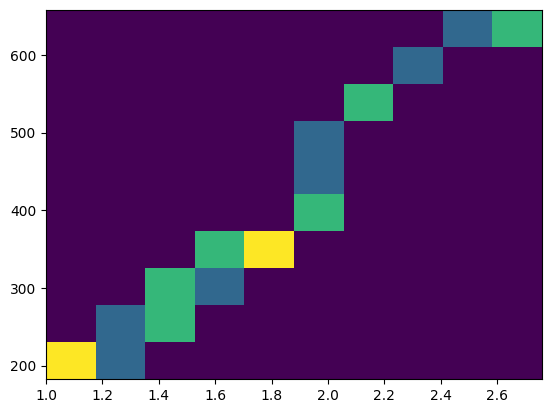

In [8]:
from matplotlib import pyplot as plt
plt.hist2d(data["laborprice"],data["cost"])
